In [1]:
import numpy as np

In [2]:
import pandas as pd

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
books=pd.read_csv('Books.csv')
rating=pd.read_csv('Ratings.csv')
user=pd.read_csv('Users.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_19804\3530263522.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [7]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
print(books.shape)
print(user.shape)
print(rating.shape)

(271360, 8)
(278858, 3)
(1048575, 3)


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
books.duplicated().sum()

0

In [13]:
rating.duplicated().sum()

72

In [14]:
user.duplicated().sum()

0

(array([7.6280e+04, 8.3747e+04, 7.6520e+03, 3.3900e+02, 3.8000e+01,
        7.0000e+00, 2.0000e+01, 1.3000e+01]),
 array([  0. ,  30.5,  61. ,  91.5, 122. , 152.5, 183. , 213.5, 244. ]),
 <BarContainer object of 8 artists>)

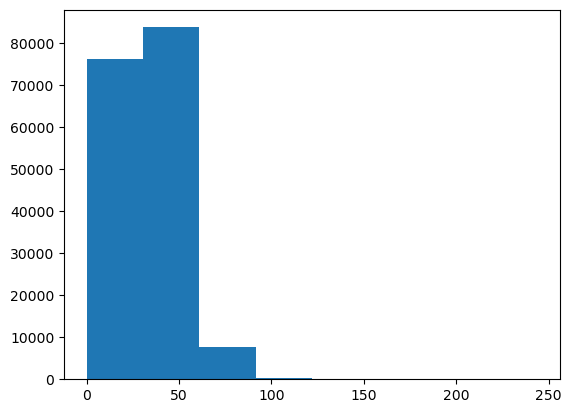

In [15]:
plt.hist(user['Age'],bins=8)

In [16]:
user['Age'].mean()

34.75143370454978

In [17]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [18]:
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [19]:
ratings_with_name = rating.merge(books,on='ISBN')

In [20]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230215,Ã?Â?l- Connection.,1
230216,Ã?Â?lpiraten.,2
230217,Ã?Â?rger mit Produkt X. Roman.,4
230218,Ã?Â?stlich der Berge.,2


In [21]:
num_rating_df.rename(columns={'Book-Rating':'total-rating'},inplace=True)
num_rating_df

,Book-Title,total-rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230215,Ã?Â?l- Connection.,1
230216,Ã?Â?lpiraten.,2
230217,Ã?Â?rger mit Produkt X. Roman.,4
230218,Ã?Â?stlich der Berge.,2


In [22]:
avg_rating_df = ratings_with_name[['Book-Title', 'Book-Rating']]

In [23]:
avg_rating_df['Book-Rating']=pd.to_numeric(avg_rating_df['Book-Rating'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19804\373083584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_rating_df['Book-Rating']=pd.to_numeric(avg_rating_df['Book-Rating'])


In [24]:
avg_rating_df = avg_rating_df.groupby('Book-Title').mean()['Book-Rating'].reset_index()

In [25]:
avg_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230215,Ã?Â?l- Connection.,0.00
230216,Ã?Â?lpiraten.,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,5.25
230218,Ã?Â?stlich der Berge.,4.00


In [26]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,total-rating,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
...,...,...,...
230215,Ã?Â?l- Connection.,1,0.00
230216,Ã?Â?lpiraten.,2,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,4,5.25
230218,Ã?Â?stlich der Berge.,2,4.00


In [27]:
popular_df = popular_df[popular_df['total-rating']>=250]
popular_df

,Book-Title,total-rating,Book-Rating
727,1984,259,4.393822
778,1st to Die: A Novel,469,3.616205
997,2nd Chance,323,3.374613
1669,A Bend in the Road,313,3.226837
3817,A Heartbreaking Work of Staggering Genius,269,3.501859
...,...,...,...
223133,Whispers,267,2.217228
223338,White Oleander : A Novel,353,3.546742
223339,White Oleander : A Novel (Oprah's Book Club),327,3.785933
224193,Wicked: The Life and Times of the Wicked Witch...,286,3.678322


In [28]:
popular_df=popular_df.sort_values('Book-Rating',ascending=False).head(50)
popular_df

,Book-Title,total-rating,Book-Rating
76830,Harry Potter and the Goblet of Fire (Book 4),346,5.945087
76842,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211
76834,Harry Potter and the Order of the Phoenix (Boo...,316,5.544304
76822,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645
182892,The Hobbit : The Enchanting Prelude to The Lor...,261,4.969349
76853,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343
178857,The Fellowship of the Ring (The Lord of the Ri...,340,4.885294
209806,To Kill a Mockingbird,463,4.684665
175236,The Da Vinci Code,828,4.679952
172364,The Catcher in the Rye,401,4.615960


In [29]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','total-rating','Book-Rating']]

In [49]:
popular_df

,Book-Title,Book-Author,Image-URL-M,total-rating,Book-Rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,346,5.945087
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,380,5.884211
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,316,5.544304
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,501,5.177645
12,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,261,4.969349
13,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,519,4.938343
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,340,4.885294
24,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,463,4.684665
32,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,828,4.679952
38,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,401,4.615960


In [31]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']
x=x[x>200]
x=x.index
x

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       249111, 249628, 249862, 249894, 250184, 250405, 250764, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=737)

In [32]:
 ratings_with_name[ratings_with_name['User-ID'].isin(x)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...
941108,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm),http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [33]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(x)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...
941108,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm),http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [34]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']
y=y[y>=50]
y=y.index
y

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Moon', 'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=603)

In [35]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(y)]

In [36]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
56,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
58,3363,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
59,7158,446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
62,11676,446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
67,23768,446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
937464,245963,380781506,0,Remember Me,Danice Allen,1996,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...
937465,246671,380781506,0,Remember Me,Danice Allen,1996,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...
938778,247429,073940086X,0,Mirror Image,Danielle Steel,0,Delacorte Press,http://images.amazon.com/images/P/073940086X.0...,http://images.amazon.com/images/P/073940086X.0...,http://images.amazon.com/images/P/073940086X.0...
939428,248718,031202164X,8,Ashes to Ashes,Mary Monica Pulver,1988,Horizon Book Promotions,http://images.amazon.com/images/P/031202164X.0...,http://images.amazon.com/images/P/031202164X.0...,http://images.amazon.com/images/P/031202164X.0...


In [37]:
final_ratings.drop_duplicates

<bound method DataFrame.drop_duplicates of         User-ID        ISBN  Book-Rating      Book-Title  \
56       278418   446520802            0    The Notebook   
58         3363   446520802            0    The Notebook   
59         7158   446520802           10    The Notebook   
62        11676   446520802           10    The Notebook   
67        23768   446520802            6    The Notebook   
...         ...         ...          ...             ...   
937464   245963   380781506            0     Remember Me   
937465   246671   380781506            0     Remember Me   
938778   247429  073940086X            0    Mirror Image   
939428   248718  031202164X            8  Ashes to Ashes   
940825   250405   399144781            0  Southern Cross   

                      Book-Author Year-Of-Publication  \
56                Nicholas Sparks                1996   
58                Nicholas Sparks                1996   
59                Nicholas Sparks                1996   
62      

In [38]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [39]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
pt.fillna(0,inplace=True)

In [41]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.11013674, 0.0127091 , ..., 0.12447747, 0.07552261,
        0.04645965],
       [0.11013674, 1.        , 0.22459428, ..., 0.07780233, 0.1752651 ,
        0.12821608],
       [0.0127091 , 0.22459428, 1.        , ..., 0.04617038, 0.05001715,
        0.11450939],
       ...,
       [0.12447747, 0.07780233, 0.04617038, ..., 1.        , 0.07085128,
        0.02054493],
       [0.07552261, 0.1752651 , 0.05001715, ..., 0.07085128, 1.        ,
        0.11104108],
       [0.04645965, 0.12821608, 0.11450939, ..., 0.02054493, 0.11104108,
        1.        ]])

In [44]:
similarity_scores.shape

(603, 603)

In [45]:
np.where(pt.index=='4 Blondes')[0][0]

3

In [46]:
def recommend(book_name):
        index = np.where(pt.index == book_name)[0][0]
        distances = similarity_scores[index]
        similar_items = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]
        for i in similar_items:
            print(pt.index[i[0]])

In [47]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Saving Faith
Middlesex: A Novel
The Sweet Potato Queens' Book of Love


In [52]:
import pickle

In [54]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [55]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))